<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 2</center></h1>

- Nome completo: Vinicius Gonçalves Paraizo Borges
- [Link para vídeo](<A>)

# (1) Engenharia de Features

O conjunto de dados diamonds contém informações sobre mais de 50.000 diamantes, incluindo
características como quilate, corte, cor, pureza e preço. Este item visa avaliar a sua capacidade
de realizar transformações úteis nas variáveis disponíveis e criar novas features que
potencialmente aumentem o poder preditivo de modelos de regressão.

Realize a engenharia de features no conjunto de dados diamonds, considerando as instruções
abaixo:

1. Criação de Novas Features: Crie pelo menos duas novas variáveis derivadas das
existentes. Algumas possibilidades incluem:

    - Combinação de variáveis (ex.: volume do diamante a partir de x, y, z);
    - Codificação ordinal (ex.: transformar cut, color, clarity em variáveis numéricas
com base em seu nível de qualidade percebido);
    - Transformações logarítmicas ou polinomiais de variáveis contínuas (ex.: log(carat),
carat2);
    - Criação de variáveis binárias ou categóricas a partir de limiares relevantes.

2. Justificativa: Para cada nova feature criada, explique o raciocínio por trás da transformação
ou combinação. Justifique por que ela pode ser útil para um modelo de regressão
que prediz o preço do diamante.

3. Visualização Exploratória: Inclua pelo menos dois gráficos (ex.: boxplots, scatterplots
com regressão, heatmaps) que ajudem a ilustrar como suas novas features se
relacionam com o preço do diamante.

4. Entrega: Apresente o código utilizado, os gráficos gerados e as justificativas das novas
features no vídeo explicativo do trabalho.

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv'
diamonds = pd.read_csv(path)

In [ ]:
# Explanatory Data Analysis

diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*OBS:*

Importante ressaltar os percentis de 'carat', 'price' e 'x', 'y', 'z'. Valores baixos até o percentil 75, em comparação com os seus respectivos máximos.


<Axes: xlabel='carat', ylabel='Count'>

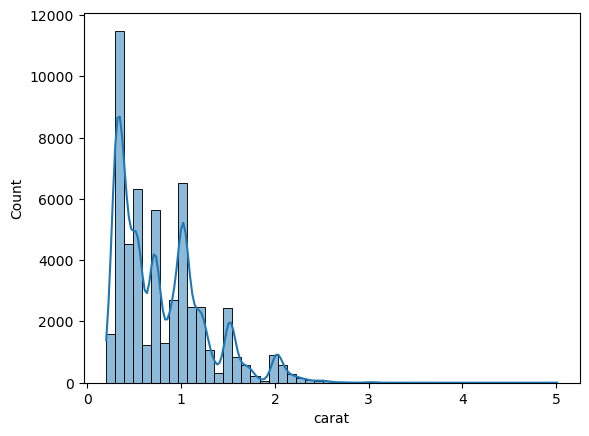

In [ ]:
import seaborn as sns

# Carat

sns.histplot(diamonds['carat'], bins=50, kde=True)

# Percebe-se que a distribuição de carat está assimétrica
# indicando que a maior parte dos diamantes tem um carat baixo

<Axes: xlabel='price', ylabel='Count'>

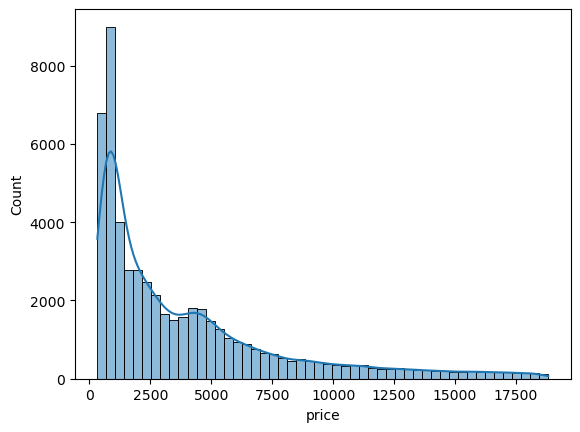

In [ ]:
import seaborn as sns

# price

sns.histplot(diamonds['price'], bins=50, kde=True)

# A distribuição de price está altamente concentrada.
# A grande maioria dos diamantes tem preço baixo.
# Vimos anteriormente que seu percentil(75) é R$ 5324

<Axes: xlabel='depth', ylabel='Count'>

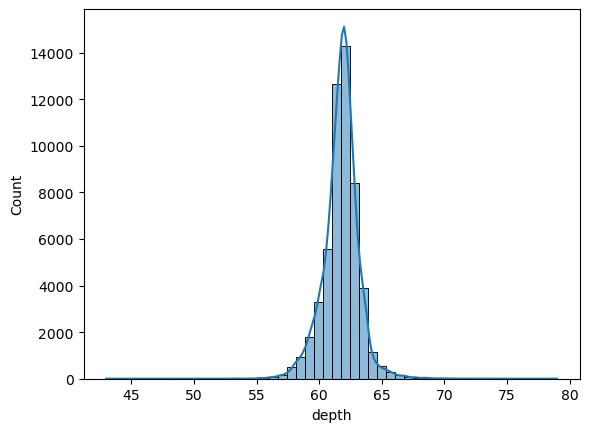

In [ ]:
import seaborn as sns

# depth

sns.histplot(diamonds['depth'], bins=50, kde=True)

# Alta concentração dos dados, ao segmentarmos a distribuição em bins

<Axes: xlabel='color', ylabel='price'>

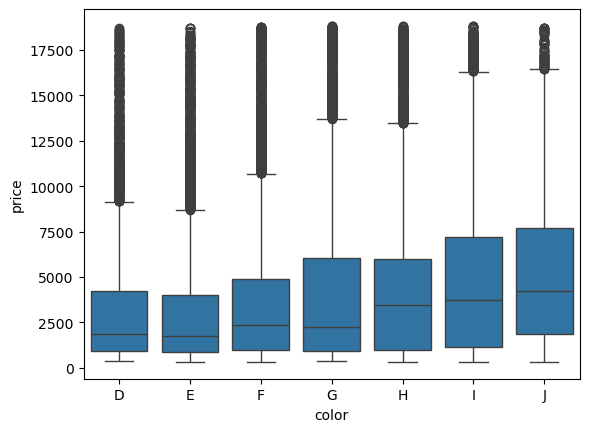

In [ ]:
import seaborn as sns

# Dados categóricos:
# diamond colour, from J (worst) to D (best)

sns.boxplot(x='color', y='price', data=diamonds, order=sorted(diamonds['color'].unique()))

# Vemos que a tendência do preço é subir conforme a cor vai ficando melhor

<Axes: xlabel='cut', ylabel='price'>

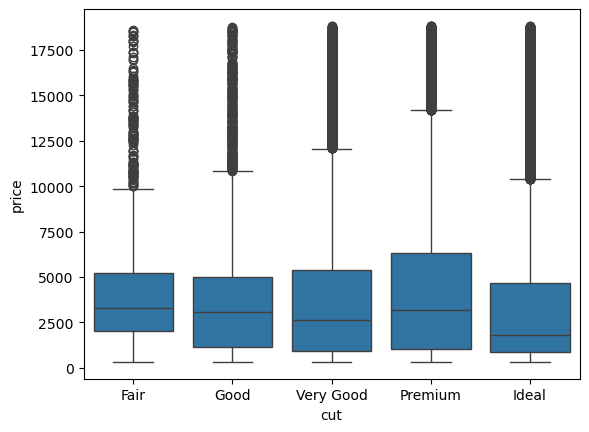

In [ ]:
import seaborn as sns

# Dados categóricos:
# CUT

ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

sns.boxplot(x='cut', y='price', data=diamonds, order=ordinalidade_cut)

# Notamos um crescimento no preço levando em conta seus limites superiores
# com exceção de 'Ideal', onde isso não ocorre.
# Porém, no geral, seus 1os e 3os quartis permanecem bem próximos.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Vamos codificar as variáveis categóricas para plotar o gráfico de calor

ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordinalidade_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordinalidade_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categorical_cols = ['cut', 'color', 'clarity']

# Cria o encoder com as categorias especificadas
ordinal_encoder = OrdinalEncoder(categories=[ordinalidade_cut, ordinalidade_color, ordinalidade_clarity])

# Aplica o fit_transform diretamente nas colunas categóricas
df_encoded = ordinal_encoder.fit_transform(diamonds[categorical_cols])

# Adicionar ao dataframe original
diamonds[categorical_cols] = df_encoded

print(diamonds.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0    326  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0    326  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0    327  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0    334  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0    335  4.34  4.35  2.75


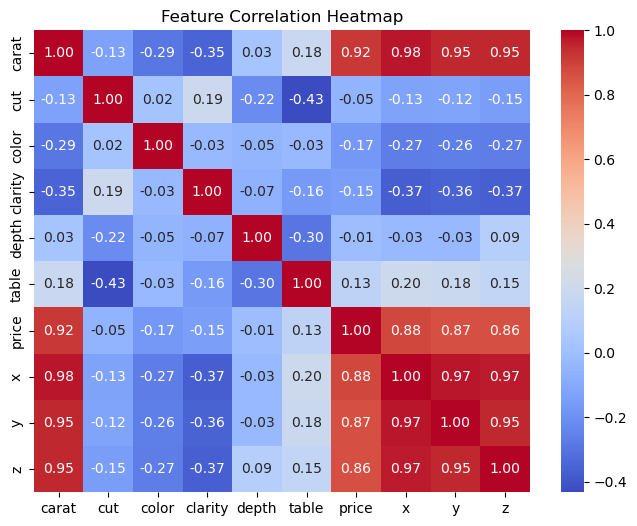

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Uma vez as variáveis categóricas codificadas, podemos fazer o
# Mapa de calor de correlação entre as variáveis.

# Dessa forma, podemos entender a relação que as variáveis tem entre si e 
# ver o quanto cada uma está correlacionada com a outra.

# Isso é fundamental na etapa de análise exploratória dos dados e posteriormente
# podermos fazer a feature engineering.


plt.figure(figsize=(8, 6))
sns.heatmap(diamonds.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

*Observações gerais:*

- CARAT tem um alta correlação positiva com PRICE, X, Y e Z.

- X, Y e Z estão correlacionados à PRICE positivamente.

- X, Y e Z estão correlacionados positivamente entre si.

- PRICE e CARAT possuem distribuições assimétricas e é bem desproporcionado.

- Tendência de PRICE subir conforme COLOR vai ficando de melhor qualidade. (ordinal encoding é uma boa prática nesse caso)

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_depth
0,0.23,Ideal,E,SI2,61.5,-1.099672,326,-1.587837,-1.536196,-1.571129,5.789960,0.207014,4.135167
1,0.21,Premium,E,SI1,59.8,1.585529,326,-1.641325,-1.658774,-1.741175,5.789960,0.190620,4.107590
2,0.23,Good,E,VS1,56.9,3.375663,327,-1.498691,-1.457395,-1.741175,5.793014,0.207014,4.058717
3,0.29,Premium,I,VS2,62.4,0.242928,334,-1.364971,-1.317305,-1.287720,5.814131,0.254642,4.149464
4,0.31,Good,J,SI2,63.3,0.242928,335,-1.240167,-1.212238,-1.117674,5.817111,0.270027,4.163560


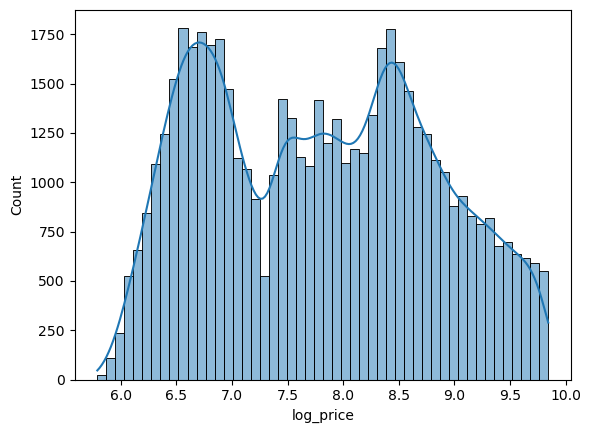

In [40]:
import numpy as np
import seaborn as sns
# Como as variáveis CARAT, DEPTH e PRICE possuem distribuições assimétricas, concentradas em certos intervalos,
# podemos criar novas variáveis com a transformação logarítmica dessas colunas.

# Isso ajuda o modelo a interpretar os dados de forma mais linear, reduzindo a assimetria e facilitando a 
# modelagem.

diamonds['log_price'] = np.log1p(diamonds['price'])
diamonds['log_carat'] = np.log1p(diamonds['carat'])
diamonds['log_depth'] = np.log1p(diamonds['depth'])

# exemplo de distribuição com log aplicado
sns.histplot(diamonds['log_price'], bins=50, kde=True)
diamonds.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Além disso, podemos colocar outras features que também podem fazer sentido:

# Antes, aplicamos StandardScaler para normalizarmos os dados
scaler = StandardScaler()
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
diamonds[numeric_features] = scaler.fit_transform(diamonds[numeric_features])

# Novas FEATURES:
# Como as dimensões do diamante X, Y e Z estão fortemente correlacionadas com o preço do diamante,
# podemos acrescentar VOLUME, sendo uma representação mais completa e informativa do tamanho.
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# DEPTH_RATIO é uma forma de capturar a proporcionalidade da forma do diamante.
# Dessa forma, será possível capturar se certos padrões geométricos/formas podem ser mais valorizadas.
# Z / Y --> (depth / width)
diamonds['depth_ratio'] = diamonds['z'] / diamonds['y'] 

In [42]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_depth,volume,depth_ratio
0,-1.198168,Ideal,E,SI2,-0.174092,-1.099672,326,-1.587837,-1.536196,-1.571129,5.789960,0.207014,4.135167,-3.832344,1.022740
1,-1.240361,Premium,E,SI1,-1.360738,1.585529,326,-1.641325,-1.658774,-1.741175,5.789960,0.190620,4.107590,-4.740502,1.049676
2,-1.198168,Good,E,VS1,-3.385019,3.375663,327,-1.498691,-1.457395,-1.741175,5.793014,0.207014,4.058717,-3.803048,1.194717
3,-1.071587,Premium,I,VS2,0.454133,0.242928,334,-1.364971,-1.317305,-1.287720,5.814131,0.254642,4.149464,-2.315428,0.977541
4,-1.029394,Good,J,SI2,1.082358,0.242928,335,-1.240167,-1.212238,-1.117674,5.817111,0.270027,4.163560,-1.680285,0.921992


# (2) Classificação Ordinal Multi-classes

Nesta item, você deve revisitar os seguinte arquivo A652.pickle. No Trabalho 1, você enquadrou
o problema como uma tarefa de classificação binária. Desta vez, você deve enquadrar o
problema como uma tarefa de classificação ordinal multi-classes. Concretamente, desta vez,
você deve discretizar os valores de precipitação (medidos em mm/h) produzindo cinco níveis
(classes), conforme o seguinte mapeamento:

### (3) SHAP Values

### (4) Redução de dimensionalidade

### (5) Predição Conforme

Considere novamente o conjunto de dados diamonds. Neste item, você
deve usar a técnica de predição conforme (conformal prediction) para produzir intervalos de
predição para os exemplos que separar para seu conjunto de testes. Apresente uma análise
para os exemplos do conjunto de testes que apresentarem o maior e o menor intervalos.

In [ ]:
import pandas as pd

url = '/data/diamonds.csv'

diamonds = pd.read_csv(url)



FileNotFoundError: [Errno 2] No such file or directory: '/data/diamonds.csv'